# Defining Transfer Systems in MATLAB

There are two forms of transfer function representation in MATLAB. The most obvious is the polynomial form where

$$G(s) = \frac{b(s)}{a(s)} = \frac{s^2 + 2 s + 3}{s^3 + 4 s^2 + 5 s + 6}$$

is entered as two row vectors with the polynomial coefficients entered in the order of descending powers of $s$.

In [27]:
imatlab_export_fig('print-svg')  % Static svg figures.

In [28]:
b = [1, 2, 3];
a = [1, 4, 5, 6];

Missing coefficients, must be entered as zero: so $q(s)=s^2+2s$ and $r(s)=s^4+s^2+1$ are entered as

In [29]:
q = [1, 2, 0];
r = [1, 0, 2, 0, 1];

An alternative form of representation for transfer functions is the *factored polynomial*, for example

$$G(s) = \frac{(s + 1)(s + 3)}{s(s + 2)(s + 4)}$$ 

The advantage of this formulation is that the *zeros* of the numerator and denominator polynomials are obvious by inspection. So it is often used in the preliminary analysis of the performance of a dynamic system. The *poles* of this transfer function are $s = 0,\;−2,\;−4$ and the *zeros* are $s = −1,\;−3$.

In MATLAB, this form of transfer function is specified by a column vector of the zeros and a column vector of the poles:

In [30]:
z = [-1; -3];
p = [0; -2; -4];

A third parameter, the overall gain $K$, completes the definition of the so called *pole-zero-gain* form of transfer function. In this case $K =1$:

In [31]:
K = 1;

## The Linear Time Invariant System Object

Starting from version 4 of the *Control System Toolbox* (distributed with MATLAB version 5), the Mathworks introduced a new data object for the creation and manipulation of system transfer functions. This object is called the *Linear Time Invariant (LTI) System Object*. It is used to gather the components of a transfer function (or state-space model) into a single variable which can then easily be combined with other LTI system objects.

To create a LTI system object representing a factored transfer function the following command is issued: 

In [32]:
G = zpk(z,p,K)


G =
 
   (s+1) (s+3)
  -------------
  s (s+2) (s+4)
 
Continuous-time zero/pole/gain model.



The expanded numerator and denominator form of the transfer function is readily obtained by using a “data extraction” function. 

In [33]:
[num,den]=tfdata(G,'v')

num =
     0     1     4     3
den =
     1     6     8     0


LTI system objects can also be created from the expanded form of a transfer function directly:

In [34]:
G2=tf(num,den)


G2 =
 
    s^2 + 4 s + 3
  -----------------
  s^3 + 6 s^2 + 8 s
 
Continuous-time transfer function.



and the zeros and poles similarly extracted:

In [35]:
[zeros,poles,gain]=zpkdata(G2,'v')

zeros =
    -3
    -1
poles =
     0
    -4
    -2
gain =
     1


## Setting LTI Properties

Numerous options are available to document the LTI system objects that you create. For example, suppose the transfer function $G$ represents a servomechanism with input `'Voltage'` and output `'Angular Position'`. We can add this information to the LTI system as follows: 

In [36]:
set(G,'inputname','Voltage','outputname','Angular Position');
G


G =
 
  From input "Voltage" to output "Angular Position":
   (s+1) (s+3)
  -------------
  s (s+2) (s+4)
 
Continuous-time zero/pole/gain model.



 Such documentary information is probably best added when the LTI system object is created, for example as: 

In [37]:
G3=zpk(z,p,K,'inputname','Armature Voltage (V)',... 
'outputname','Load Shaft Position (rad)',... 
'notes','An armature voltage controlled servomechanism')


G3 =
 
  From input "Armature Voltage (V)" to output "Load Shaft Position (rad)":
   (s+1) (s+3)
  -------------
  s (s+2) (s+4)
 
Continuous-time zero/pole/gain model.



Once the LTI object has been documented, the documentation can be extracted using commands like:

In [38]:
get(G3,'notes')

ans =
  1x1 cell array
    {'An armature voltage controlled servomechanism'}


All the documentation available on an LTI system object may be extracted with a single command:

In [39]:
get(G3)

                Z: {[2x1 double]}
                P: {[3x1 double]}
                K: 1
    DisplayFormat: 'roots'
         Variable: 's'
          IODelay: 0
       InputDelay: 0
      OutputDelay: 0
               Ts: 0
         TimeUnit: 'seconds'
        InputName: {'Armature Voltage (V)'}
        InputUnit: {''}
       InputGroup: [1x1 struct]
       OutputName: {'Load Shaft Position (rad)'}
       OutputUnit: {''}
      OutputGroup: [1x1 struct]
            Notes: {'An armature voltage controlled servomechanism'}
         UserData: []
             Name: ''
     SamplingGrid: [1x1 struct]


There are numerous other documentation features provided for LTI system objects. Please consult the on-line help for [set](https://uk.mathworks.com/help/control/ref/set.html) and [get](https://uk.mathworks.com/help/control/ref/get.html) for full details.

## System Transformations

MATLAB supports the easy transformation of LTI system objects between expanded and factored forms<sup>[1](#fn2)</sup>. For example to convert a transfer function from 'expanded' form to pole-zero-gain form the following command is used:

In [40]:
G4 = zpk(G2)


G4 =
 
   (s+3) (s+1)
  -------------
  s (s+4) (s+2)
 
Continuous-time zero/pole/gain model.



To convert from zero-pole-gain form to expanded form we use the function `tf`:

In [41]:
G5 = tf(G)


G5 =
 
  From input "Voltage" to output "Angular Position":
    s^2 + 4 s + 3
  -----------------
  s^3 + 6 s^2 + 8 s
 
Continuous-time transfer function.



Please note that these transformations are merely a convenience that allow you to work with your preferred form of representation. Most of the tools that deal with LTI system objects will work with any form<sup>[2](#fn1)</sup>.

## Combining LTI System Objects

A powerful feature of the LTI system object representation is the ease with which LTI objects can be combined. For example, suppose we have two transfer functions

$$G_1(s)=\frac{s+1}{s+3}$$

and

$$G_2(s)=\frac{10}{s(s+2)}$$

then the series combination of the two transfer functions $G_s(s) = G_1(s)G_2(s)$ is obtained using the "`*`" (multiplication) operator:

In [42]:
G1=tf([1 1],[1 3]);
G2=tf(10,conv([1 0],[1 2])); % conv is polynomial multiplication
Gs=G1*G2 % series connection of two sys objects


Gs =
 
      10 s + 10
  -----------------
  s^3 + 5 s^2 + 6 s
 
Continuous-time transfer function.



The parallel connection of two LTI system objects corresponds to addition $G_p=G_1(s)+G_2(s)$:

In [43]:
Gp = G1 + G2


Gp =
 
  s^3 + 3 s^2 + 12 s + 30
  -----------------------
     s^3 + 5 s^2 + 6 s
 
Continuous-time transfer function.



The feedback connection of two LTI system objects is also supported. The function `feedback` is used for this. 

Let

$$G(s)=\frac{2s^2 + 5s + 1}{s^2 + 2s + 3}$$ 

be the forward transfer function of a closed-loop system and 

$$H(s) = \frac{5(s+2)}{(s+10)}$$

be the feedback network. Then the closed-loop transfer function<sup>[3](#fn3)</sup> is 

$$G_{c}(s)=\frac{G(s)}{1 + G(s)H(s)}.$$

In MATLAB: 

In [44]:
G = tf([2 5 1],[1 2 3],'inputname','torque',...
'outputname','velocity');
H = zpk(-2,-10,5);
Gc = feedback(G,H) % negative feedback assumed


Gc =
 
  From input "torque" to output "velocity":
  0.18182 (s+0.2192) (s+2.281) (s+10)
  -----------------------------------
   (s+3.419) (s^2 + 1.763s + 1.064)
 
Continuous-time zero/pole/gain model.



## The Analysis of LTI System Objects

MATLAB uses the LTI system objects as parameters for the analysis tools such as `impulse`, `step`, `nyquist`, `bode`, `nichols` and `rlocus`. 

As an example of their use try: 

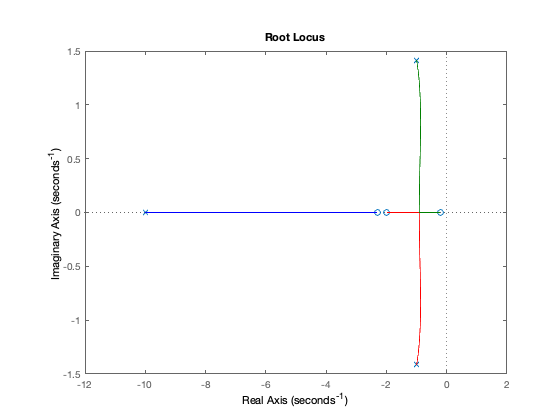

In [45]:
rlocus(G*H) % root locus 

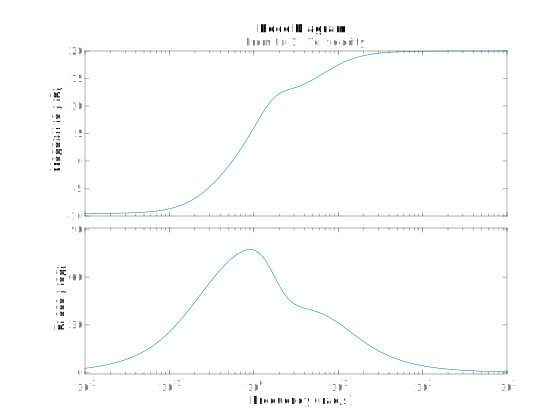

In [46]:
bode(G*H)% open-loop frequency response 

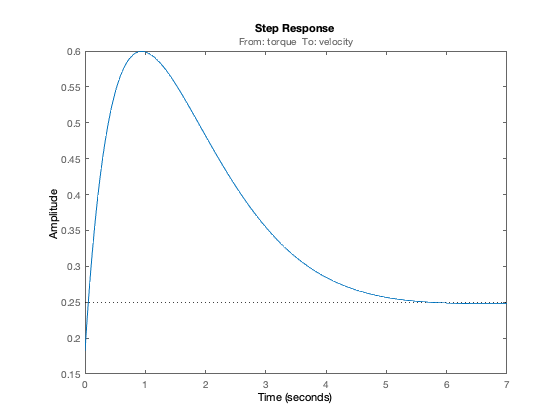

In [47]:
step(Gc) % closed-loop step response

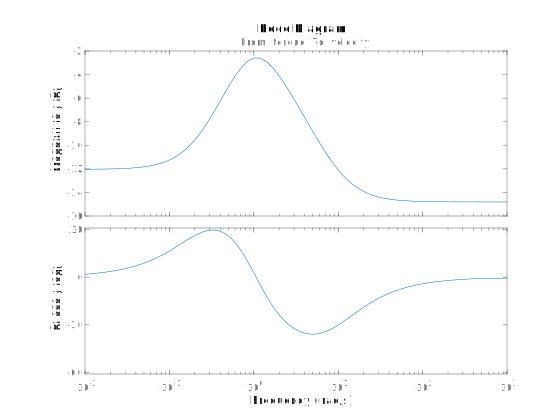

In [48]:
bode(Gc) % closed-loop frequency response

Matlab also provides two interactive graphical tools that work with LTI system objects.

* `linearSystemAnalyzer` is a graphical tool that can be used to analyze
systems defined by LTI objects. It provides easy access to LTI objects
and time and frequency response analysis tools.
* `controlSystemDesigner` is an interactive tool for designing controllers.

You are encouraged to experiment with these tools.

## Partial Fraction Expansions

MATLAB provides a command called `residue` that returns the partial fraction expansion of a transfer function. That is, given 

$$G(s) = \frac{s^m + b_{m–1}s^{m–1} + \cdots + b_1 s + b_0}{s^n + a_{n–1}s^{n–1} + \cdots + a_1 s + a_0}$$
it returns 

$$\frac{R_1}{s + p_1} + \frac{R_2}{s + p_2} + \cdots \frac{R_n}{s + p_n} + K(s)$$

where $p_i$ are the poles of the transfer function, $r_i$ are the coefficients of the partial fraction terms (called the *residues* of the poles) and $K(s)$ is a remainder polynomial which is usually empty. 

To use this, the starting point must (rather perversely) be the expanded form of the transfer function in polynomial form. Thus given 

$$C(s) = \frac{5(s + 2)}{s(s + 3)(s + 10)}$$ 

we obtain the partial fraction expansion using the MATLAB command sequence:

In [49]:
k = 5; z = [-2]; p = [0; -3; -10]; % zero-pole-gain form 
C = zpk(z,p,k); 
[num,den] = tfdata(C,'v')

num =
     0     0     5    10
den =
     1    13    30     0


(Note that the leading terms in `num` *are* zero). 

In [50]:
[r,p,k] = residue(num,den)

r =
   -0.5714
    0.2381
    0.3333
p =
   -10
    -3
     0
k =
     []


which we interpret to mean 

$$C(s) = \frac{0.3333}{s} + \frac{0.2381}{s + 3} - \frac{0.5714}{s + 5}.$$

If $C(s)$ represents the step response of the system 

$$G(s) = \frac{5(s + 2)}{(s + 3)(s + 10)}$$

then the step response is, by inspection, 

$$c(t) = 0.3333\epsilon(t) + 0.2381 e^{-3t} - 0.5714 e^{-10t}.$$

You can check this with the command:


newC =
 
     5 s + 10
  ---------------
  s^2 + 13 s + 30
 
Continuous-time transfer function.



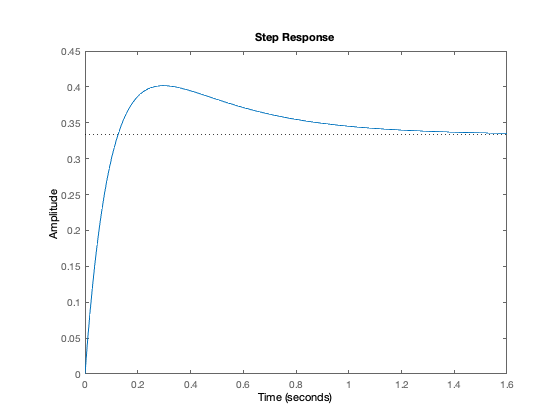

In [51]:
newC = tf([5, 10],[1, 13, 30])
step(newC)

(where the $1/s$ term has been eliminated because `step` provides the forcing function itself). This should give exactly the same results as:

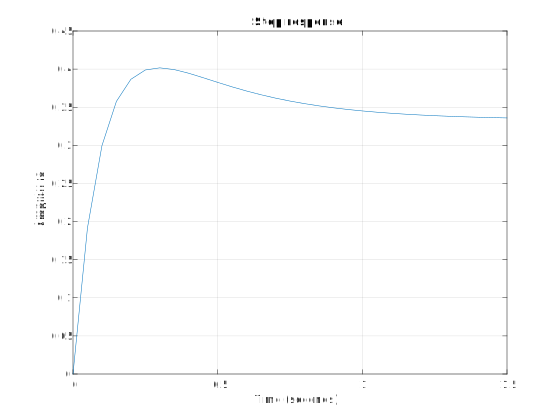

In [52]:
t = 0:.05:1.5; % time vector 
c = 0.3333 + 0.2381 * exp(-3*t) - 0.5714 * exp(-10*t);
plot(t,c),...
title('Step response'),...
xlabel('Time (seconds)'),...
ylabel('Amplitude'),...
grid

## Read More

The Mathworks official documentation on LTI Objects is [Linear (LTI) Models](https://uk.mathworks.com/help/control/getstart/linear-lti-models.html).

## Footnotes

1. <div id="fb2">You can also convert to and from state-space forms.</div>
2. <div id="fn1">This is the most significant change from version 4 of MATLAB. There were, for example several forms of the function for obtaining step-responses (`step(num,den)`, `step(A,B,C,D)`) now there is just one `step(sys)`. 
3. <div id="fn3">Assuming negative feedback.</div>